In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rawpy

In [2]:
raw = rawpy.imread("test_capture/ground_glas_test/test_capture_20210608183803.dng")
ff = rawpy.imread("test_capture/ground_glas_test/test_capture_20210608184009.dng")

In [5]:
rgb = raw.postprocess()
rgbff = ff.postprocess()

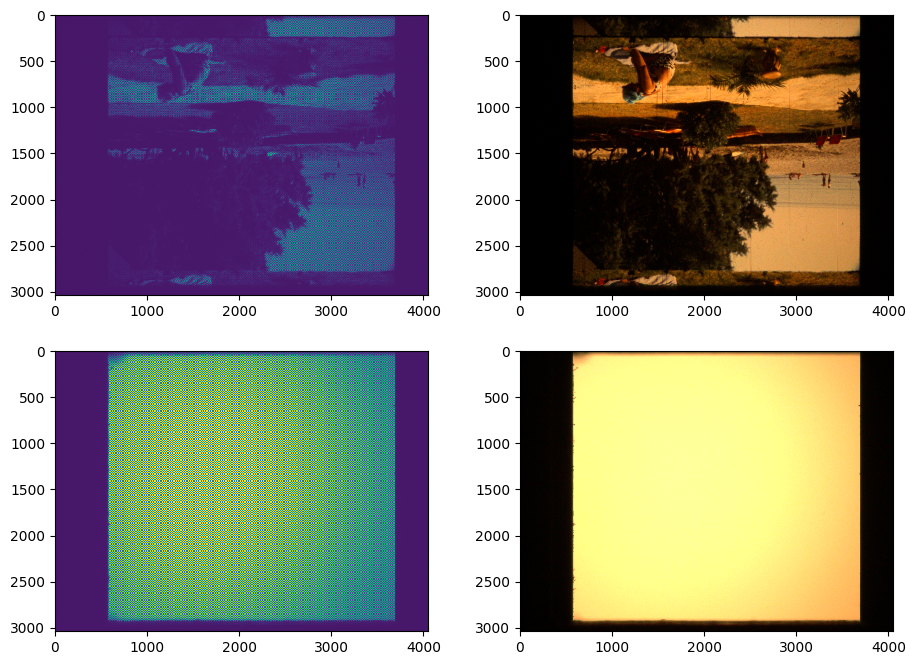

In [8]:
plt.figure(figsize=(11,8))
plt.subplot(221)
plt.imshow(raw.raw_image, interpolation="None", vmin=0, vmax=4095)
plt.subplot(222)
plt.imshow(rgb, interpolation="None", vmin=0, vmax=255)
plt.subplot(223)
plt.imshow(ff.raw_image, interpolation="None", vmin=0, vmax=4095)
plt.subplot(224)
plt.imshow(rgbff, interpolation="None", vmin=0, vmax=255)
plt.show()

In [9]:
raw.black_level_per_channel

[256, 256, 256, 256]

In [10]:
flat_field = ff.raw_image

In [11]:
black = 256

In [14]:
corrected = raw.raw_image * (raw.raw_image - black).clip(0, None) / (flat_field - black).clip(1, None)

In [19]:
corrected.astype(np.uint16)

array([[21760, 16320,   257, ...,     0, 21676,   259],
       [  129,   516,   259, ...,   777,   516,   516],
       [    0,    85, 32640, ...,   129,   777,     0],
       ...,
       [  129, 32640,    64, ...,   172,   155,     0],
       [    0,     0,    85, ...,   172,   128,    42],
       [   36,   777,   129, ...,   129,    32, 32514]], dtype=uint16)

In [20]:
raw.raw_image

array([[255, 255, 257, ..., 256, 254, 259],
       [258, 258, 259, ..., 259, 258, 258],
       [256, 257, 255, ..., 258, 259, 256],
       ...,
       [259, 255, 257, ..., 258, 259, 256],
       [256, 256, 257, ..., 258, 257, 257],
       [257, 259, 258, ..., 259, 257, 254]], dtype=uint16)

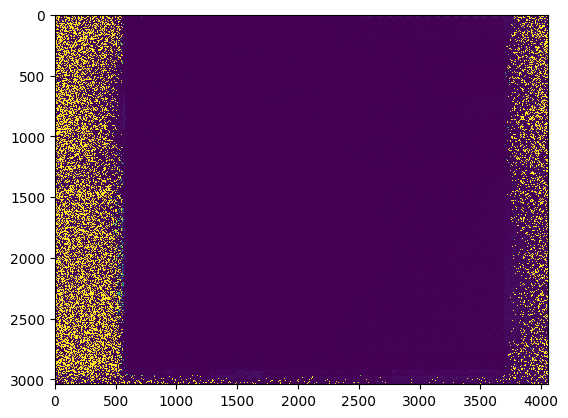

In [17]:
plt.imshow(corrected, interpolation="None", vmin=0, vmax=4095)
plt.show()

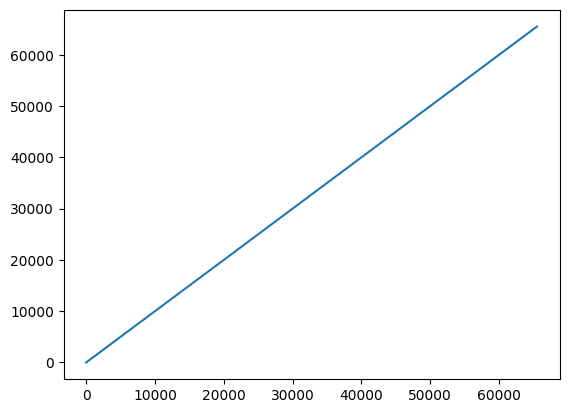

In [22]:
plt.plot(raw.tone_curve)
plt.show()